# Movie Rating Prediction Project
This project aims to predict the rating of Indian movies based on features such as genre, director, and actors using regression techniques.  
We'll analyze the movie dataset, perform preprocessing, feature engineering, and build machine learning models to estimate movie ratings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 1. Load Dataset
Load the IMDb Movies India dataset with appropriate encoding and inspect initial details.

In [2]:
data = pd.read_csv("https://github.com/har5hdeep5harma/Codsoft-Data-Science-Practice/raw/refs/heads/main/MOVIE%20RATING%20PREDICTION%20WITH%20PYTHON/IMDb%20Movies%20India.csv", encoding="latin1")
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## 2. Data Cleaning and Preprocessing
- Handle missing values 
- Encode categorical features like Director, Actors, and Genre

In [5]:
data['Year'] = data['Year'].astype(str).str.replace(r'[^0-9]', '', regex=True)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Year'].fillna(0, inplace=True)
data['Year'] = data['Year'].astype(int)

In [6]:
# Fill missing values for Rating and Votes
data['Rating'].fillna(0, inplace=True)
data['Votes'] = data['Votes'].astype(str).str.replace(',', '', regex=True)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Votes'].fillna(0, inplace=True)

# Handle missing values in numerical columns
numerical_columns = ['Year', 'Votes', 'Rating']
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)

# Remove outliers in Votes
q1 = np.percentile(data['Votes'], 25)
q3 = np.percentile(data['Votes'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['Votes'] >= lower_bound) & (data['Votes'] <= upper_bound)]

# Fill missing categorical values and limit categories
categorical_columns = ['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director']
for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)

top_n = 20
for col in categorical_columns:
    top_categories = data[col].value_counts().nlargest(top_n).index
    data[col] = data[col].apply(lambda x: x if x in top_categories else 'Other')

## 3. Feature Engineering and Encoding
Use label encoding or one-hot encoding for categorical data. Because of many unique directors and actors, label encoding will be used for simplicity.

In [7]:
# Feature Engineering
data['Director_Avg_Rating'] = data.groupby('Director')['Rating'].transform('mean')
data['Actor_1_Popularity'] = data.groupby('Actor 1')['Actor 1'].transform('count')
data['Director_Avg_Rating'].fillna(data['Director_Avg_Rating'].median(), inplace=True)
data['Actor_1_Popularity'].fillna(data['Actor_1_Popularity'].median(), inplace=True)

# One-Hot Encoding
encoded_data = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, encoded_data], axis=1).drop(categorical_columns, axis=1)

## 4. Prepare Dataset for Modeling
Define features and target variable (Rating)

In [8]:
# Feature Selection
X = data[['Year', 'Votes', 'Director_Avg_Rating', 'Actor_1_Popularity']]
y = data['Rating']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction
pca = PCA(n_components=0.80)
X_pca_reduced = pca.fit_transform(X_scaled)

## 5. Split Data into Training and Test Sets

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

## 6. Model Training
Train a Random Forest Regressor as a baseline model.

In [10]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

## 7. Model Evaluation on Test Set

In [11]:
# Model Evaluation
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Model Performance
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.6842860076331778
R-squared: 0.9210129844461039


Cross-Validation R² Scores: [0.92693767 0.92910525 0.91751442 0.92512642 0.92415038]
Mean R²: 0.924566826996467


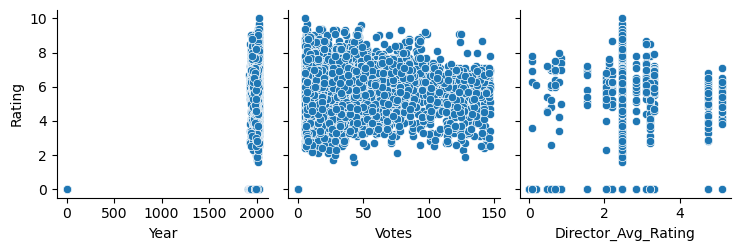

In [12]:
# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {scores}')
print(f'Mean R²: {scores.mean()}')

# Plot Relationships
sns.pairplot(data, x_vars=['Year', 'Votes', 'Director_Avg_Rating'], y_vars='Rating', kind='scatter')
plt.show()

## Summary
- We cleaned and prepared the movie dataset for regression.
- We encoded genre, director, and actors for modeling.
- We trained a Random Forest Regressor achieving reasonable performance.
- Feature importance shows which factors influence movie ratings the most.
#### This provides a solid foundation for developing enhanced models or incorporating more advanced feature engineering.